In [1]:
from __future__ import print_function
__author__= 'fbb'
import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#distributions=gaus,chi squared, poisson, cauchy, binomial, lnormal
mean=100
md={}
md['gaus']={} #creating a 'gaus' branch in the md dictionary
md['gaus']['means'] = {} #crating a 'means' branch inside the 'gaus' branch

In [3]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print(len(mysize),mysize)
for n in mysize:
    md['gaus'][n]=np.random.normal(mean,0.2,100)

99 [2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20]


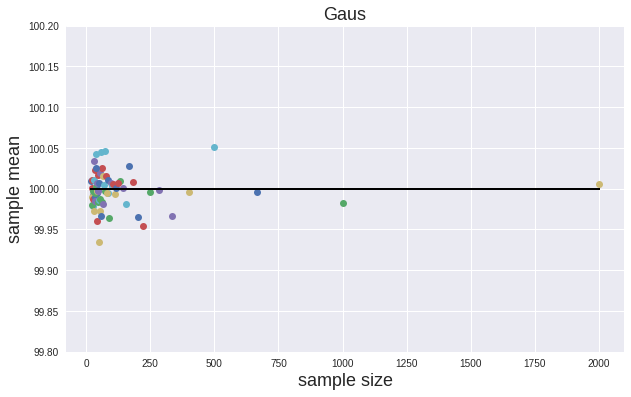

In [4]:
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111) #formatting the plott
for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean() #saving the means for each nn distribution
        #and plot it
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaus', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')
        axgaus_mu_n.set_ylim([99.8,100.2])

In [5]:
#This distribution complies with the Central limit theorem; which states that the sum
#of several independent variables (in this case each sample) tends to a normal distribution
#i.e. mu tends to m as the size of the sample tends to infinity

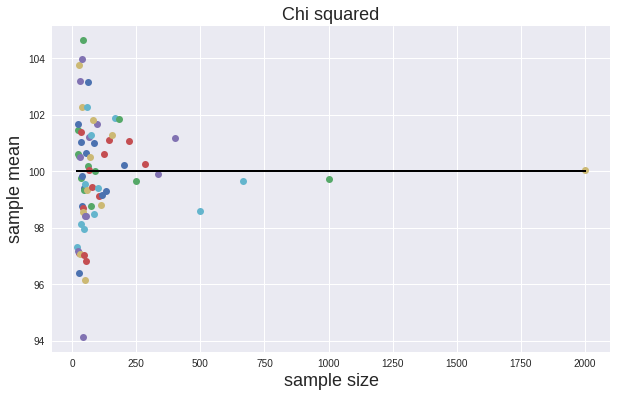

In [6]:
df=mean
md['chisq'] = {} 
#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)   
# save the means for plotting later    
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [7]:
#This distribution complies with the Central limit theorem; which states that the sum
#of several independent variables (in this case each sample) tends to a normal distribution
#i.e. mu tends to m as the size of the sample tends to infinity
#Chi squared and Poisson are, out of the five, the ones that deviate the most from the mean

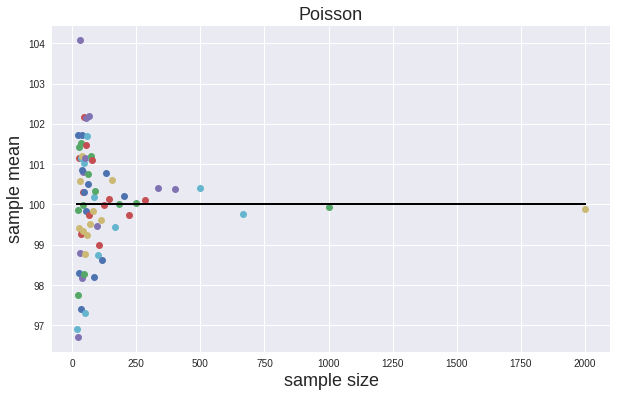

In [8]:
md['poisson'] = {} 
#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['poisson'][n] = np.random.poisson(lam=mean, size = n)   
# save the means for plotting later    
md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in md['chisq']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

In [9]:
#This distribution complies with the Central limit theorem; which states that the sum
#of several independent variables (in this case each sample) tends to a normal distribution
#i.e. mu tends to m as the size of the sample tends to infinity
#Chi squared and Poisson are, out of the five, the ones that deviate the most from the mean

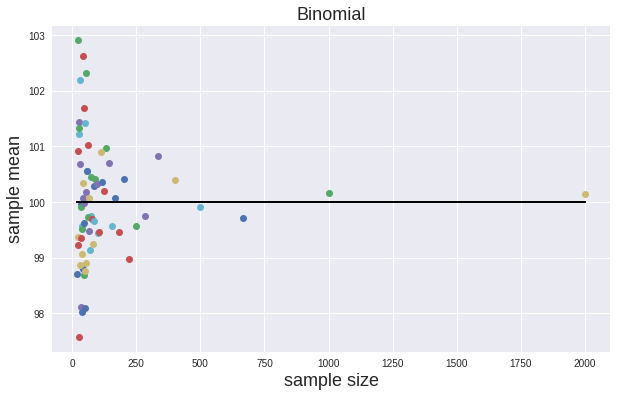

In [10]:
p=0.5
n=mean/p
md['binomial'] = {}
md['binomial']['means'] = {}
#and do it in a for loop. not pythonic, but easily readable
for i in mysize:
    md['binomial'][i] = np.random.binomial(n, p, size = i)   
# save the means for plotting later 
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

In [11]:
#This distribution complies with the Central limit theorem; which states that the sum
#of several independent variables (in this case each sample) tends to a normal distribution
#i.e. mu tends to m as the size of the sample tends to infinity

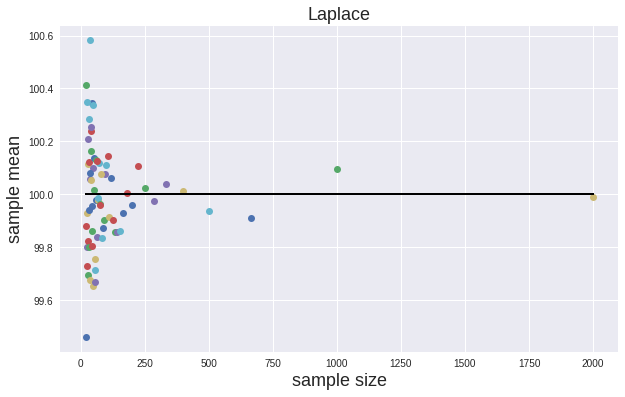

In [12]:
md['laplace'] = {}
md['laplace']['means'] = {}
#and do it in a for loop. not pythonic, but easily readable
for i in mysize:
    md['laplace'][i] = np.random.laplace(mean,size=i)   
# save the means for plotting later 
axlaplace_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['laplace'][nn].mean()
        #and plot it
        axlaplace_mu_n.plot(nn, md['laplace']['means'][nn], 'o')
        axlaplace_mu_n.set_xlabel('sample size', fontsize=18)
        axlaplace_mu_n.set_ylabel('sample mean', fontsize=18)
        axlaplace_mu_n.set_title('Laplace', fontsize=18)
        axlaplace_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

In [13]:
#This distribution complies with the Central limit theorem; which states that the sum
#of several independent variables (in this case each sample) tends to a normal distribution
#i.e. mu tends to m as the size of the sample tends to infinity
#Out of the five plotted distributions, this is the one that deviates the less from the mean.

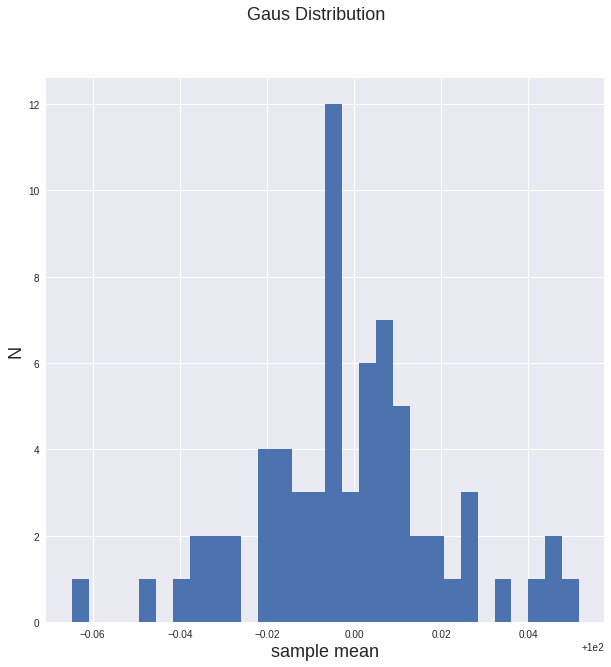

In [14]:
allmeans = list(md['gaus']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Gaus Distribution', fontsize = 18)

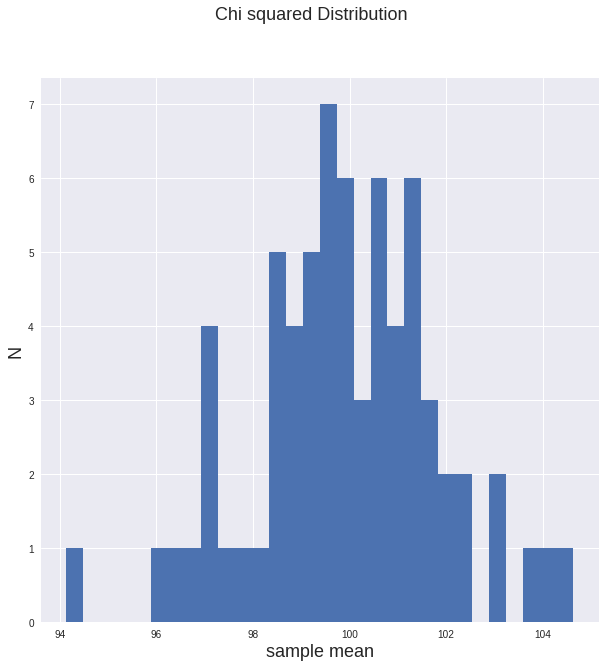

In [15]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Chi squared Distribution', fontsize = 18)

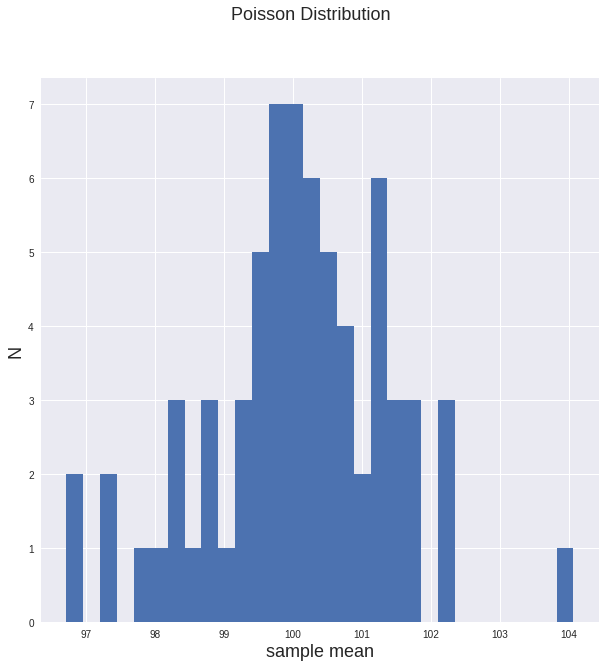

In [16]:
allmeans = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Poisson Distribution', fontsize = 18)

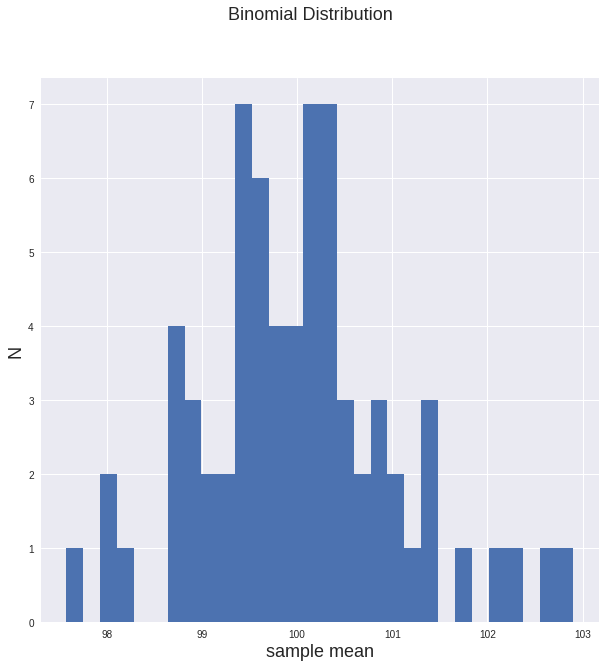

In [17]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Binomial Distribution', fontsize = 18)

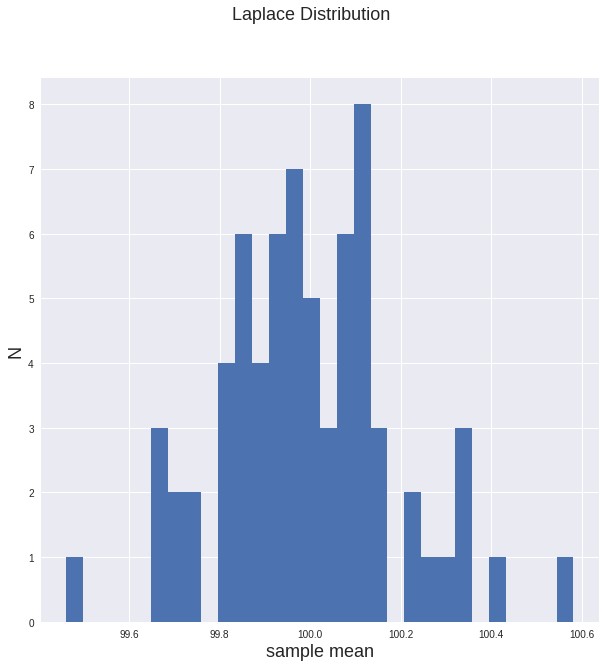

In [18]:
allmeans = list(md['laplace']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Laplace Distribution', fontsize = 18)